<a href="https://colab.research.google.com/github/Mandeep-sa/AI_Automed_Skin_ILLNESS_Predictor/blob/main/AI_Automed_Skin_ILLNESS_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
skin_dir="/content/drive/MyDrive/HAM10000_images"
skin_df = pd.read_csv(os.path.join(skin_dir, 'HAM10000_metadata.csv'))
skin_df.head(100)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
95,HAM_0000746,ISIC_0027023,bkl,histo,60.0,male,face,vidir_modern
96,HAM_0001473,ISIC_0029022,bkl,histo,70.0,male,face,vidir_modern
97,HAM_0003007,ISIC_0025388,bkl,histo,40.0,female,abdomen,vidir_modern
98,HAM_0003007,ISIC_0028080,bkl,histo,40.0,female,abdomen,vidir_modern


In [ ]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(skin_dir, '*.jpg'))}
lesion_type_dict = {
    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}
# 0 for benign, 1 for malignant
lesion_danger = {
    'nv': 0,
    'mel': 1,
    'bkl': 0,
    'bcc': 1,
    'akiec': 1,
    'vasc': 0,
    'df': 0
}

In [ ]:
skin_df["path"] = skin_df["image_id"].map(imageid_path_dict.get) # map image_id to the path of that image

In [ ]:
skin_df["cell_type"] = skin_df["dx"].map(lesion_type_dict.get) # map dx to type of lesion

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions


In [ ]:
skin_df["Malignant"] = skin_df["dx"].map(lesion_danger.get)

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,Malignant
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Benign_keratosis-like_lesions,0


In [ ]:
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes

In [ ]:
skin_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,Malignant,cell_type_idx
8380,HAM_0000211,ISIC_0029609,nv,histo,35.0,female,upper extremity,vienna_dias,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Melanocytic_nevi,0,4
2177,HAM_0006964,ISIC_0029642,mel,histo,60.0,female,lower extremity,rosendahl,/content/drive/MyDrive/HAM10000_images/ISIC_00...,melanoma,1,6
6178,HAM_0005446,ISIC_0031868,nv,follow_up,55.0,male,abdomen,vidir_molemax,/content/drive/MyDrive/HAM10000_images/ISIC_00...,Melanocytic_nevi,0,4


In [ ]:
from PIL import Image

In [ ]:
reshaped_image = skin_df["path"].map(lambda x: np.asarray(Image.open(x).resize((64,64), resample=Image.LANCZOS).convert("RGB")).ravel())

In [ ]:
out_vec = np.stack(reshaped_image, 0)

In [ ]:
out_df = pd.DataFrame(out_vec)

In [ ]:
out_df["label"] = skin_df["cell_type_idx"]

In [ ]:
out_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,191,152,194,191,153,195,192,149,192,194,...,185,154,180,186,156,184,182,152,173,2
1,24,13,23,24,14,28,37,24,46,61,...,26,15,29,27,15,28,24,13,25,2
2,185,129,140,192,136,151,198,142,156,198,...,152,120,138,144,113,123,115,81,84,2
3,24,11,19,36,19,30,64,38,50,91,...,27,13,16,25,12,16,24,9,14,2
4,138,94,117,158,113,138,178,133,161,191,...,140,106,118,108,77,92,67,40,55,2


In [ ]:
out_path = "hmnist_64_64_RBG.csv"
out_df.to_csv(out_path, index=False)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
skin_df = pd.read_csv(out_path)

In [ ]:
skin_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,191,152,194,191,153,195,192,149,192,194,...,185,154,180,186,156,184,182,152,173,2
1,24,13,23,24,14,28,37,24,46,61,...,26,15,29,27,15,28,24,13,25,2
2,185,129,140,192,136,151,198,142,156,198,...,152,120,138,144,113,123,115,81,84,2
3,24,11,19,36,19,30,64,38,50,91,...,27,13,16,25,12,16,24,9,14,2
4,138,94,117,158,113,138,178,133,161,191,...,140,106,118,108,77,92,67,40,55,2


In [ ]:
label = skin_df["label"].values
X = skin_df.drop("label", axis=1).to_numpy()

In [ ]:
X

array([[ 0.67216599, -0.16856591,  0.73683767, ...,  0.47815093,
        -0.16856591,  0.28413588],
       [-2.92789109, -3.1650206 , -2.94944832, ..., -2.92789109,
        -3.1650206 , -2.90633386],
       [ 0.54282262, -0.66438215, -0.42725264, ..., -0.96618334,
        -1.69912909, -1.63445741],
       ...,
       [-0.94462611, -1.13864117, -1.09552671, ...,  0.26257865,
        -0.16856591, -0.29790927],
       [-0.01766531, -0.79372552, -0.3194665 , ...,  0.47815093,
        -0.14700868,  0.0685636 ],
       [ 0.34880757, -0.34102373, -0.59971047, ...,  0.26257865,
        -0.53503878, -0.8583972 ]])

In [ ]:
X.shape, label.shape

((10015, 12288), (10015,))

In [ ]:
X_mean = np.mean(X)
X_std = np.std(X)

X = (X - X_mean)/X_std
X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, label, test_size=0.1,random_state=0)
X_train_orig.shape, X_test.shape, y_train_orig.shape, y_test.shape
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7210, 12288), (1803, 12288), (7210,), (1803,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(64, 64, 3))
X_val = X_val.reshape(X_val.shape[0], *(64, 64, 3))
X_test = X_test.reshape(X_test.shape[0], *(64, 64, 3))

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((7210, 64, 64, 3), (1803, 64, 64, 3), (1002, 64, 64, 3))

In [ ]:
y_train.shape

(7210,)

In [ ]:
y_train = to_categorical(y_train) #one-hot encoding
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((7210, 7), (1803, 7), (1002, 7))

CNN Model

In [ ]:
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(64, 64, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'], run_eagerly=True )

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        1849

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
batch_size = 64
epochs = 30
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=val_datagen.flow(X_val, y_val),
                    verbose=1, steps_per_epoch=(X_train.shape[0] // batch_size),
                    callbacks=[learning_rate_reduction])


Epoch 1/30
112/112 [==============================] - 77s 686ms/step - loss: 0.7733 - accuracy: 0.7141 - val_loss: 0.7637 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 2/30
112/112 [==============================] - 95s 847ms/step - loss: 0.7423 - accuracy: 0.7298 - val_loss: 0.7124 - val_accuracy: 0.7432 - lr: 0.0010
Epoch 3/30
112/112 [==============================] - 79s 703ms/step - loss: 0.7300 - accuracy: 0.7282 - val_loss: 0.7559 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 4/30
112/112 [==============================] - 76s 679ms/step - loss: 0.7088 - accuracy: 0.7368 - val_loss: 0.7316 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 5/30
112/112 [==============================] - 74s 664ms/step - loss: 0.7056 - accuracy: 0.7410 - val_loss: 0.6765 - val_accuracy: 0.7499 - lr: 0.0010
Epoch 6/30
112/112 [==============================] - 75s 672ms/step - loss: 0.6799 - accuracy: 0.7410 - val_loss: 0.6927 - val_accuracy: 0.7366 - lr: 0.0010
Epoch 7/30
112/112 [==============================] 

In [ ]:
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=1)
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))


57/57 [==============================] - 4s 73ms/step - loss: 0.6280 - accuracy: 0.7593
Validation: accuracy = 0.759290  ;  loss_v = 0.628026
Test: accuracy = 0.762475  ;  loss = 0.666908


Text(0.5, 1.0, 'Training and validation loss')

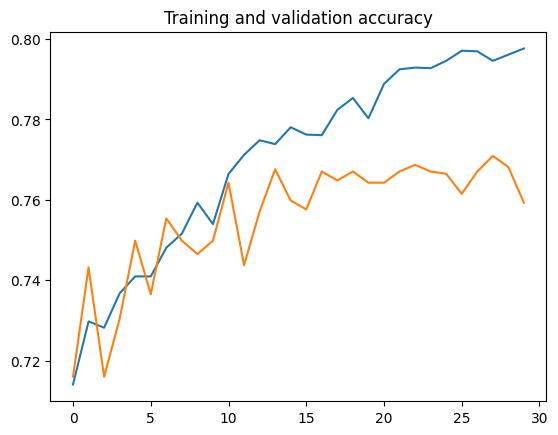

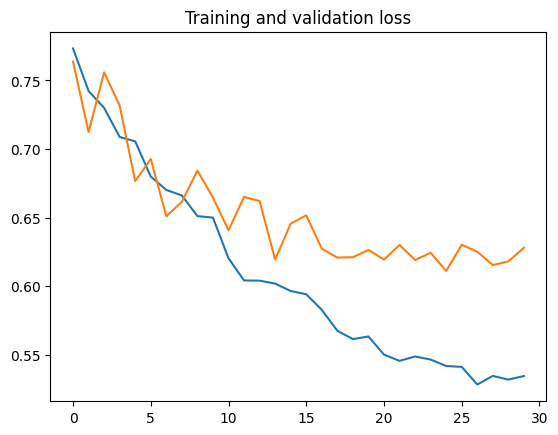

In [ ]:
# A list of accuracy results on training and test datasets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# A list of loss results on training and test datesets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotted training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plotted training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')